# IBM - Applied Data Science Capstone - Battle of Neighborhoods Week4

## Tasks
1. Identify a business problem 
2. Define the business problem 
3. Describe how data can be used to solve the problem
4. Describe how Fourquare data can be leveraged 
5. Use data science to provide a solution 
6. Interpret and explain the results 
7. Report interpretation and results in a concise report

**Tasks 1-4 are part of Week 4 exercise. Tasks 5-7 are part of Week 5 exercise.**


---

### Introduction/Business Problem

A beer connoisseur would like to visit breweries across United States to supplement his research on attributes that make a brewery commercially successful.  The end goal is to assess whether there are business opportunities in the beer brewing industry and to identify drivers that increase the likelihood of establishing a successful brewery. There are numerous attributes that draw more customers to a venue or a product. Besides obvious and intrinsic factors such as quality, uniqueness and taste, extrinsic factors such as market demand, location, and brand play important roles in determining the viability of a brewery business. Some of the external factors can be studied using data. Population density is a simple proxy for exploring the impact of market demand, and the influence of location can be studied by exploring the places around successful breweries. These two aspects can be studied concurrently by exploring the locations around successful breweries in big populated cities across the united states.

The beer enthusiast intends to use his beer palate to reveal the qualitative aspects of a good product and use data analysis to quantitatively assess what makes a brewery thrive. The task at hand involves the following steps: (1) select top N big cities in the country; (2) identify highly rated breweries in each city; (3) explore the location of breweries and identify commonalities among them using clustering;(4) interpret the results and assess business viability in light of this assessment. The insights gleaned from studying successful breweries will supplement the development of a business plan to establish a new brewery. 

### Data Requirements

Data required corresponding to each step discussed above:
1.	A list of cities with their population density/size along with their coordinates – The data points are widely available, albeit not well organized. A free tier on Simplemaps.com provides access to a list of world cities with their coordinates and population. https://simplemaps.com/data/us-cities
2.	Foursquare API can be leveraged to identify top ‘liked’ breweries in each city selected in step 1. 
3.	Foursquare API can be leveraged to explore the location/vicinity of selected breweries. 
4.	Vicinity attributes of each brewery across the country can be grouped and analyzed.

In [91]:
import pandas as pd
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [2]:
df_uscities= pd.read_excel('UScities.xlsx')
df_uscities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922,1840034016
1,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12815475,1840020491
2,Chicago,Chicago,41.8373,-87.6862,United States,US,USA,Illinois,NaN,8675982,1840000494
3,Miami,Miami,25.7839,-80.2102,United States,US,USA,Florida,NaN,6381966,1840015149
4,Dallas,Dallas,32.7936,-96.7662,United States,US,USA,Texas,NaN,5733259,1840019440


In [3]:
df_cities = df_uscities.loc[:,["city","lat","lng"]]
df_cities.columns = ["City", "Latitude","Longitude"]
df_cities.head()

,City,Latitude,Longitude
0,New York,40.6943,-73.9249
1,Los Angeles,34.1139,-118.4068
2,Chicago,41.8373,-87.6862
3,Miami,25.7839,-80.2102
4,Dallas,32.7936,-96.7662


In [4]:
df_topcities = df_cities.iloc[0:10,:]
df_topcities

,City,Latitude,Longitude
0,New York,40.6943,-73.9249
1,Los Angeles,34.1139,-118.4068
2,Chicago,41.8373,-87.6862
3,Miami,25.7839,-80.2102
4,Dallas,32.7936,-96.7662
5,Philadelphia,40.0077,-75.1339
6,Houston,29.7869,-95.3905
7,Washington,38.9047,-77.0163
8,Atlanta,33.7627,-84.4225
9,Boston,42.3188,-71.0846


In [5]:
map_us = folium.Map(location=[38, -102], zoom_start=4)
map_us

In [6]:
# add markers to map
for lat, lng, city in zip(df_topcities['Latitude'], df_topcities['Longitude'], df_topcities['City']):
    label = '{}, {}, {}'.format(city,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_us)  
    
map_us

In [7]:
CLIENT_ID = '1VRUZN2ID4JNFQF3E0CAZK4IJBS5XOG5N54XRMIPPKW0J42K' # your Foursquare ID
client_secret = open('CLIENT SECRET.txt','r')
CLIENT_SECRET = client_secret.read() # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: 1VRUZN2ID4JNFQF3E0CAZK4IJBS5XOG5N54XRMIPPKW0J42K


In [12]:
categoryId= "50327c8591d4c4b30a586d5d"
radius=5000
limit=10
print(lat)
print(lng)
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                lng,
                radius,
                categoryId,
                limit)
results = requests.get(url).json()["response"]['groups'][0]['items']
results
brew_in_city = pd.DataFrame([item for brewery_list in breweries_list for item in brewery_list])
 brew_in_city.columns = ['City' 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
                  

42.3188
-71.0846


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a7daee1f964a5202aef1fe3',
   'name': 'Samuel Adams Brewery',
   'location': {'address': '30 Germania St',
    'crossStreet': 'btwn Brookside Ave & Bismark St',
    'lat': 42.31452312808352,
    'lng': -71.10315482791518,
    'labeledLatLngs': [{'label': 'display',
      'lat': 42.31452312808352,
      'lng': -71.10315482791518},
     {'label': '?', 'lat': 42.314119, 'lng': -71.103568}],
    'distance': 1599,
    'postalCode': '02130',
    'cc': 'US',
    'city': 'Boston',
    'state': 'MA',
    'country': 'United States',
    'formattedAddress': ['30 Germania St (btwn Brookside Ave & Bismark St)',
     'Boston, MA 02130',
     'United States']},
   'categories': [{'id': '50327c8591d4c4b30a586d5d',
     'name': 'Brewery',
     'pluralName': 'Breweries',
     'shortName': 'Brewery',
     'icon': {'prefix': 'https://ss3.4sq

In [194]:
def get_breweries(city, lat, lng, radius, categoryId):
    limit=10
    breweries_list=[]
    for lat, lng, city in zip(df_topcities['Latitude'], df_topcities['Longitude'], df_topcities['City']):
        print('{}'.format(city))
    
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                lng,
                radius,
                categoryId,
                limit)

       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        breweries_list.append([(
            city,
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
      
    brew_in_city = pd.DataFrame([item for brewery_list in breweries_list for item in brewery_list])
    brew_in_city.columns = ['City', 
                  'Latitude', 
                  'Longitude',
                  'Brewery ID',         
                  'Brewery', 
                  'Brewery Latitude', 
                  'Brewery Longitude',
                  'Brewery Category']              
   
    
    return(brew_in_city)

In [195]:
breweries_in_cities = get_breweries(city=df_topcities['City'], lat=df_topcities['Latitude'], 
                 lng = df_topcities['Longitude'],
                 radius = 10000,
                 categoryId = '50327c8591d4c4b30a586d5d')

New York
Los Angeles
Chicago
Miami
Dallas
Philadelphia
Houston
Washington
Atlanta
Boston


In [254]:
print(breweries_in_cities.shape)
breweries_in_cities.head()
breweries_in_cities.groupby('City').count()

(100, 9)


,Latitude,Longitude,Brewery ID,Brewery,Brewery Latitude,Brewery Longitude,Brewery Category,Likes
City,,,,,,,,
Atlanta,10,10,10,10,10,10,10,10
Boston,10,10,10,10,10,10,10,10
Chicago,10,10,10,10,10,10,10,10
Dallas,10,10,10,10,10,10,10,10
Houston,10,10,10,10,10,10,10,10
Los Angeles,10,10,10,10,10,10,10,10
Miami,10,10,10,10,10,10,10,10
New York,10,10,10,10,10,10,10,10
Philadelphia,10,10,10,10,10,10,10,10


In [210]:
brewery_id='3fd66200f964a5205deb1ee3'
likes_url= 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'. format(
                brewery_id,            
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION
                )    
test = requests.get(likes_url).json()['response']['likes']['count']
test

1457

In [213]:
i=0
results_likes=[]
for brewery_id in breweries_in_cities['Brewery ID']:
    likes_url= 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'. format(
                brewery_id,            
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION
                )
    results_likes.append([requests.get(likes_url).json()['response']['likes']['count']])    


In [221]:
#results_likes = pd.DataFrame(results_likes, columns=['Likes'])
results_likes.shape
#breweries_in_cities['Likes']=results_likes['Likes']
breweries_in_cities.head()

,City,Latitude,Longitude,Brewery ID,Brewery,Brewery Latitude,Brewery Longitude,Brewery Category,Likes
0,New York,40.6943,-73.9249,56f6cd56cd102dca40d553c9,Kings County Brewers Collective,40.705974,-73.923487,Brewery,242
1,New York,40.6943,-73.9249,3fd66200f964a5205deb1ee3,Brooklyn Brewery,40.721706,-73.957734,Brewery,1457
2,New York,40.6943,-73.9249,57c436c5498ee0a356760d88,Interboro Spirits and Ales,40.712771,-73.937030,Brewery,159
3,New York,40.6943,-73.9249,5a455ff1b8fd9d266f246125,Grimm Artisanal Ales,40.714494,-73.936422,Brewery,207
4,New York,40.6943,-73.9249,57eaf6a7498ee4d106a06ebf,Evil Twin Brewing NYC,40.696225,-73.904225,Brewery,71


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

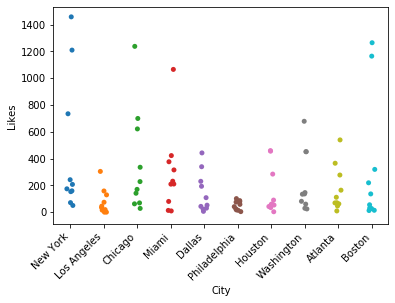

In [231]:
#breweries_sorted_likes = breweries_in_cities.sorted_values(['Likes'])
ax = sns.stripplot(x='City', y='Likes', data=breweries_in_cities)
plt.xticks(rotation=45, ha='right')

In [50]:
# add markers to map
for lat, lng, city, venue in zip(breweries_in_cities['Brewery Latitude'], breweries_in_cities['Brewery Longitude'], 
                                 breweries_in_cities['City'], breweries_in_cities['Brewery']):
    label = '{}, {}'.format(venue, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_us)  
    
map_us

In [62]:
def nearby_breweries(city, brewery, brew_lat,  brew_lng, radius):
    limit=50
    nearby_breweries_list=[]
    for brew_lat, brew_lng, city, brewery in zip(breweries_in_cities['Brewery Latitude'], breweries_in_cities['Brewery Longitude'], 
                                 breweries_in_cities['City'], breweries_in_cities['Brewery']):
        print('{} - {}'.format(brewery, city))
    
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                brew_lat,
                brew_lng,
                radius,
                limit)

       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        nearby_breweries_list.append([(
            city,
            brewery,
            brew_lat, 
            brew_lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
      
    nearby_breweries = pd.DataFrame([item for nearby_brewery_list in nearby_breweries_list for item in nearby_brewery_list])
    nearby_breweries.columns = ['City',
                                'Brewery',
                  'Brewery Latitude', 
                  'Brewery Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']              
   
    
    return(nearby_breweries)


In [63]:
explore_breweries = nearby_breweries(city= breweries_in_cities['City'], brew_lat = breweries_in_cities['Brewery Latitude'],
                                     brew_lng= breweries_in_cities['Brewery Longitude'], 
                                     brewery = breweries_in_cities['Brewery'], radius = 500 )

Kings County Brewers Collective - New York
Brooklyn Brewery - New York
Interboro Spirits and Ales - New York
Grimm Artisanal Ales - New York
Evil Twin Brewing NYC - New York
Threes Brewing - New York
Finback Brewery - New York
Strong Rope Brewery - New York
Other Half Brewing Company - New York
Bridge and Tunnel Brewery - New York
Karl Strauss Brewing Company - Los Angeles
MacLeod Ale Brewing Co. - Los Angeles
Broxton Brew - Los Angeles
The Stalking Horse - Los Angeles
6th & La Brea - Los Angeles
The Surly Goat - Los Angeles
BJ's Restaurant & Brewhouse - Los Angeles
The Village Idiot - Los Angeles
Cismontane Brewing - Los Angeles
Bulldog Brewery LA LLC - Los Angeles
Lagunitas Brewing Company - Chicago
Marz Community Brewery - Chicago
Whiner Beer Co. Taproom - Chicago
Cruz Blanca Brewery & Taquería - Chicago
Goose Island Brewpub - Chicago
Goose Island Beer Co. - Chicago
Haymarket Pub & Brewery - Chicago
Revolution Brewing - Chicago
On Tour Brewing Company - Chicago
Forbidden Root Restau

In [65]:
print(explore_breweries.shape)
explore_breweries.head()

(3113, 8)


,City,Brewery,Brewery Latitude,Brewery Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,Kings County Brewers Collective,40.705974,-73.923487,Kings County Brewers Collective,40.705974,-73.923487,Brewery
1,New York,Kings County Brewers Collective,40.705974,-73.923487,Local Honey,40.704902,-73.924325,Nail Salon
2,New York,Kings County Brewers Collective,40.705974,-73.923487,House of Yes,40.706777,-73.923704,Nightclub
3,New York,Kings County Brewers Collective,40.705974,-73.923487,Arepera Guacuco Restaurant,40.704775,-73.924500,Arepa Restaurant
4,New York,Kings County Brewers Collective,40.705974,-73.923487,The Sampler BK,40.705627,-73.922485,Bar


In [68]:
explore_breweries_venues = explore_breweries[explore_breweries.Brewery != explore_breweries.Venue]
print(explore_breweries_venues.shape)
explore_breweries_venues.head()

(3017, 8)


,City,Brewery,Brewery Latitude,Brewery Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,New York,Kings County Brewers Collective,40.705974,-73.923487,Local Honey,40.704902,-73.924325,Nail Salon
2,New York,Kings County Brewers Collective,40.705974,-73.923487,House of Yes,40.706777,-73.923704,Nightclub
3,New York,Kings County Brewers Collective,40.705974,-73.923487,Arepera Guacuco Restaurant,40.704775,-73.924500,Arepa Restaurant
4,New York,Kings County Brewers Collective,40.705974,-73.923487,The Sampler BK,40.705627,-73.922485,Bar
5,New York,Kings County Brewers Collective,40.705974,-73.923487,Théâtre XIV,40.706121,-73.923448,Theater


In [69]:
explore_breweries_venues.groupby('Brewery').count().head()

,City,Brewery Latitude,Brewery Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Brewery,,,,,,,
3 Stars Brewing Company,6,6,6,6,6,6,6
6th & La Brea,49,49,49,49,49,49,49
8th Wonder Brewery,42,42,42,42,42,42,42
ANXO Cidery & Pintxos Bar,36,36,36,36,36,36,36
Abbey Brewing Company,49,49,49,49,49,49,49


In [83]:
# one hot encoding
breweries_onehot = pd.get_dummies(explore_breweries_venues[['Venue Category']], prefix="", prefix_sep="")

# add postalcode column back to dataframe
breweries_onehot['City'] = explore_breweries_venues['City']
breweries_onehot['Brewery name'] = explore_breweries_venues['Brewery']

# move postalcode column to the first column
fixed_columns =  [breweries_onehot.columns[-2]] + [breweries_onehot.columns[-1]] + list(breweries_onehot.columns[:-2])
breweries_onehot = breweries_onehot[fixed_columns]

breweries_onehot.head()

,City,Brewery name,ATM,Accessories Store,Acupuncturist,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
1,New York,Kings County Brewers Collective,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New York,Kings County Brewers Collective,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,New York,Kings County Brewers Collective,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,New York,Kings County Brewers Collective,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,New York,Kings County Brewers Collective,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
print(breweries_onehot.shape)
breweries_grouped = breweries_onehot.groupby(['City','Brewery name']).mean().reset_index()
breweries_grouped.head()

(3017, 326)


,City,Brewery name,ATM,Accessories Store,Acupuncturist,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Atlanta,Atlanta Brewing Company,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.000
1,Atlanta,Eventide Brewing,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.125
2,Atlanta,Max Lager's Wood-Fired Grill & Brewery,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
3,Atlanta,Monday Night Brewing,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
4,Atlanta,Monday Night Garage,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000


In [87]:
top_venues = 15

for PC in breweries_grouped['Brewery name']:
    print("----"+PC+"----")
    temp = breweries_grouped.loc[breweries_grouped['Brewery name'] == PC,'ATM':'Yoga Studio'].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Atlanta Brewing Company----
                    venue  freq
0        Recording Studio  0.17
1                Wine Bar  0.17
2           College Track  0.17
3       Electronics Store  0.17
4    Gym / Fitness Center  0.17
5          Shop & Service  0.17
6            Optical Shop  0.00
7        Pedestrian Plaza  0.00
8                Pharmacy  0.00
9               Pet Store  0.00
10            Pet Service  0.00
11         Nightlife Spot  0.00
12    Peruvian Restaurant  0.00
13  Performing Arts Venue  0.00
14           Noodle House  0.00


----Eventide Brewing----
                  venue  freq
0           Yoga Studio  0.12
1        Ice Cream Shop  0.12
2            Playground  0.06
3                  Park  0.06
4             Pet Store  0.06
5         Grocery Store  0.06
6           Coffee Shop  0.06
7                   Gym  0.06
8    Mexican Restaurant  0.06
9                Bakery  0.06
10                Track  0.06
11               Market  0.06
12           Sports Bar  0.06
13  Japan

14         Ramen Restaurant  0.02


----Forbidden Root Restaurant & Brewery----
                      venue  freq
0        Mexican Restaurant  0.16
1                       Bar  0.06
2               Pizza Place  0.06
3                  Dive Bar  0.04
4            Cosmetics Shop  0.04
5                    Bakery  0.04
6               Coffee Shop  0.04
7          Greek Restaurant  0.04
8                Restaurant  0.02
9   New American Restaurant  0.02
10          Thai Restaurant  0.02
11     Gym / Fitness Center  0.02
12           Breakfast Spot  0.02
13         Sushi Restaurant  0.02
14           Clothing Store  0.02


----Goose Island Beer Co.----
                      venue  freq
0                   Brewery  0.11
1                    Office  0.07
2               Coffee Shop  0.04
3   New American Restaurant  0.04
4    Thrift / Vintage Store  0.04
5              Soccer Field  0.04
6                Hobby Shop  0.04
7               Pizza Place  0.04
8               Music Venue  0.04
9   

14               Ramen Restaurant  0.02


----Eureka Heights Brew Co.----
                        venue  freq
0                         Bar  0.21
1          Mexican Restaurant  0.14
2                Burger Joint  0.07
3          Seafood Restaurant  0.07
4   Cajun / Creole Restaurant  0.07
5               Garden Center  0.07
6                 Music Venue  0.07
7                   BBQ Joint  0.07
8              Shop & Service  0.07
9         American Restaurant  0.07
10             Ice Cream Shop  0.07
11      Portuguese Restaurant  0.00
12       Outdoor Supply Store  0.00
13        Peruvian Restaurant  0.00
14      Performing Arts Venue  0.00


----Holler Brewing Co.----
                     venue  freq
0                      Bar  0.05
1               Food Truck  0.05
2              Art Gallery  0.05
3                  Brewery  0.05
4               Restaurant  0.05
5                      Gym  0.05
6             Cycle Studio  0.03
7       Seafood Restaurant  0.03
8              Pizza Pla

14         Optical Shop  0.02


----KUSH Wynwood----
                       venue  freq
0                        Gym  0.10
1        Japanese Restaurant  0.05
2               Burger Joint  0.05
3              Grocery Store  0.05
4             Clothing Store  0.05
5     Thrift / Vintage Store  0.05
6                        Bar  0.05
7   Mediterranean Restaurant  0.05
8         Seafood Restaurant  0.05
9                Pizza Place  0.05
10                      Park  0.05
11                Poke Place  0.05
12               Coffee Shop  0.05
13                Donut Shop  0.05
14            Ice Cream Shop  0.05


----NightLife Brewing Co.----
                   venue  freq
0       Baseball Stadium  0.14
1                 Lounge  0.09
2     Mexican Restaurant  0.05
3       Cuban Restaurant  0.05
4             Sports Bar  0.05
5          Souvenir Shop  0.05
6       Sushi Restaurant  0.05
7             Smoke Shop  0.05
8               Pharmacy  0.05
9   Fast Food Restaurant  0.05
10            

                     venue  freq
0                     Café  0.10
1                  Brewery  0.10
2       Falafel Restaurant  0.05
3                     Park  0.05
4             Climbing Gym  0.05
5               Soup Place  0.05
6     Colombian Restaurant  0.05
7                Mini Golf  0.05
8   Thrift / Vintage Store  0.05
9              Men's Store  0.05
10                     Bar  0.05
11              Hobby Shop  0.05
12      Mexican Restaurant  0.05
13              Restaurant  0.05
14            Antique Shop  0.05


----Philadelphia Brewing Company----
                     venue  freq
0                      Bar  0.13
1       Athletics & Sports  0.09
2              Pizza Place  0.09
3                     Café  0.09
4                 Dive Bar  0.04
5              Beer Garden  0.04
6   Thrift / Vintage Store  0.04
7              Music Store  0.04
8            Metro Station  0.04
9              Music Venue  0.04
10       Convention Center  0.04
11             Coffee Shop  0.04
12  

In [88]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [265]:
top_venues = 15
import numpy as np
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City','Brewery name']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
breweries_venues_sorted = pd.DataFrame(columns=columns)
breweries_venues_sorted[['City','Brewery name']] = breweries_grouped[['City','Brewery name']]

for ind in np.arange(breweries_grouped.shape[0]):
    breweries_venues_sorted.iloc[ind, 2:] = return_most_common_venues(breweries_grouped.iloc[ind, :], top_venues)

breweries_venues_sorted

,City,Brewery name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Atlanta,Atlanta Brewing Company,Electronics Store,Wine Bar,Gym / Fitness Center,College Track,Shop & Service,Recording Studio,Flea Market,Ethiopian Restaurant,Event Service,Event Space,Flower Shop,Exhibit,Falafel Restaurant,Farm,Floating Market
1,Atlanta,Eventide Brewing,Yoga Studio,Ice Cream Shop,Track,Sports Bar,Mexican Restaurant,Park,Market,Coffee Shop,Pet Store,Grocery Store,Gym,Bakery,Playground,Japanese Restaurant,Doctor's Office
2,Atlanta,Max Lager's Wood-Fired Grill & Brewery,Hotel,Hotel Bar,Coffee Shop,Bar,Rental Car Location,Convention Center,Shipping Store,Fried Chicken Joint,Mediterranean Restaurant,Bridge,Pizza Place,Spa,Southern / Soul Food Restaurant,Café,Museum
3,Atlanta,Monday Night Brewing,Liquor Store,Gym / Fitness Center,Hotel,Food Truck,Recording Studio,Dessert Shop,Strip Club,Pet Store,Thrift / Vintage Store,Scenic Lookout,Furniture / Home Store,Event Service,Event Space,Exhibit,Falafel Restaurant
4,Atlanta,Monday Night Garage,Brewery,Juice Bar,Gastropub,Beer Store,Market,Thrift / Vintage Store,Trail,Liquor Store,Pop-Up Shop,Intersection,Discount Store,Film Studio,Farm,Farmers Market,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Washington,DC Brau Brewing Co,Fried Chicken Joint,Gas Station,Dessert Shop,Convenience Store,Liquor Store,Automotive Shop,Hardware Store,Field,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Yoga Studio,Filipino Restaurant
95,Washington,Red Bear Brewing Co,Coffee Shop,Sandwich Place,Hotel,Beer Garden,Sushi Restaurant,Supermarket,Steakhouse,Sporting Goods Shop,Burger Joint,Café,Salon / Barbershop,Restaurant,Pizza Place,Pet Store,Donut Shop
96,Washington,Right Proper Brewing Company,Bar,Gay Bar,New American Restaurant,Taco Place,Cocktail Bar,Thai Restaurant,Nightclub,Gym,Pizza Place,Neighborhood,Coffee Shop,Korean Restaurant,Monument / Landmark,Movie Theater,Tea Room
97,Washington,Right Proper Brewing Production House,Indian Restaurant,Latin American Restaurant,Design Studio,Dessert Shop,Rental Car Location,Pizza Place,Performing Arts Venue,Park,Food Court,Bar,Dance Studio,American Restaurant,Wine Bar,Historic Site,Falafel Restaurant


In [268]:
top_venues = breweries_venues_sorted.groupby('1st Most Common Venue').count().sort_values(by='Cluster Labels',ascending=False)
top_venues.iloc[:10,:3]
top_venues.reset_index(inplace=True)
top_venues.head()

KeyError: 'Cluster Labels'

Text(0.5, 1, 'Top Venues around breweries')

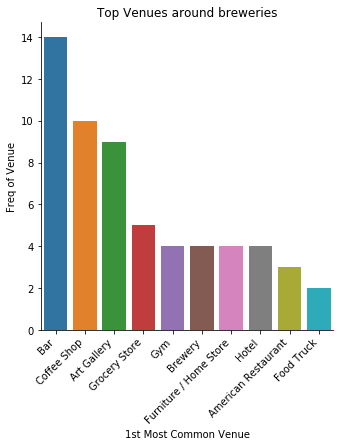

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.catplot(x='1st Most Common Venue', y='Cluster Labels', kind='bar', data=top_venues.iloc[:10,:2])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Freq of Venue')
plt.title('Top Venues around breweries')

In [174]:
# set number of clusters
kclusters = 5

breweries_grouped_clustering = breweries_grouped.drop(['City','Brewery name'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(breweries_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])

# add clustering labels

breweries_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)




[4 4 4 4 1 3 4 4 1 4]


In [255]:
breweries_merged = breweries_in_cities.drop(['City','Brewery ID','Brewery Latitude', 'Brewery Longitude', 'Brewery Category'],1)

# merge to add latitude/longitude for each venue
breweries_merged = breweries_merged.join(breweries_venues_sorted.set_index('Brewery name'), on=['Brewery'])

print(breweries_merged.groupby(['Cluster Labels','City']).count()['Brewery'])
print(breweries_merged.groupby(['Cluster Labels']).count()['Brewery'])
breweries_merged.head() 


Cluster Labels  City        
0.0             Boston           1
                Dallas           1
1.0             Atlanta          2
                Boston           1
                Chicago          4
                Dallas           1
                Houston          5
                New York         4
                Philadelphia     8
                Washington       1
2.0             Chicago          1
                Dallas           2
                Houston          1
                Miami            5
                Philadelphia     1
3.0             Atlanta          1
4.0             Atlanta          7
                Boston           7
                Chicago          5
                Dallas           6
                Houston          4
                Los Angeles     10
                Miami            5
                New York         6
                Philadelphia     1
                Washington       9
Name: Brewery, dtype: int64
Cluster Labels
0.0     2
1.0    2

,Latitude,Longitude,Brewery,Likes,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,40.6943,-73.9249,Kings County Brewers Collective,242,4.0,New York,Bar,Coffee Shop,Pizza Place,Gourmet Shop,...,Yoga Studio,Music Venue,Burger Joint,Nightclub,Middle Eastern Restaurant,Mexican Restaurant,Street Art,Nail Salon,Ethiopian Restaurant,Climbing Gym
1,40.6943,-73.9249,Brooklyn Brewery,1457,4.0,New York,Cocktail Bar,Hotel,Gym / Fitness Center,Coffee Shop,...,Bowling Alley,American Restaurant,New American Restaurant,Bar,Tennis Court,Park,Record Shop,Clothing Store,Burger Joint,State / Provincial Park
2,40.6943,-73.9249,Interboro Spirits and Ales,159,1.0,New York,Bar,Concert Hall,Coffee Shop,Music Venue,...,Art Gallery,Café,Restaurant,Fried Chicken Joint,Brewery,Cocktail Bar,Gay Bar,Sporting Goods Shop,Park,Dive Bar
3,40.6943,-73.9249,Grimm Artisanal Ales,207,1.0,New York,Deli / Bodega,Music Venue,Coffee Shop,Art Gallery,...,Concert Hall,Café,Brewery,Fried Chicken Joint,Park,Grocery Store,Gym / Fitness Center,Latin American Restaurant,Gymnastics Gym,Restaurant
4,40.6943,-73.9249,Evil Twin Brewing NYC,71,1.0,New York,Grocery Store,Deli / Bodega,Nightclub,Convenience Store,...,Coffee Shop,Mexican Restaurant,American Restaurant,Brewery,Pizza Place,Liquor Store,Diner,Indian Restaurant,Bakery,Latin American Restaurant


                 Latitude  Longitude   Likes
Cluster Labels                              
0.0             37.556200 -83.925400   18.00
1.0             37.717885 -82.237700  129.50
2.0             30.613860 -85.279400  274.00
3.0             33.762700 -84.422500   70.00
4.0             36.034008 -88.101482  264.45


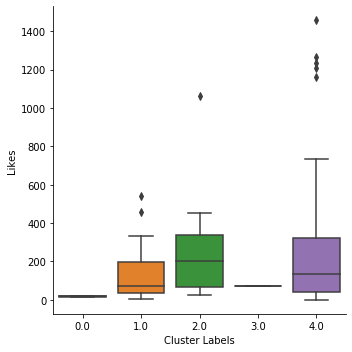

In [263]:
print(breweries_merged.groupby('Cluster Labels').mean())
sns.catplot(x="Cluster Labels", y="Likes", kind="box", data=breweries_merged)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

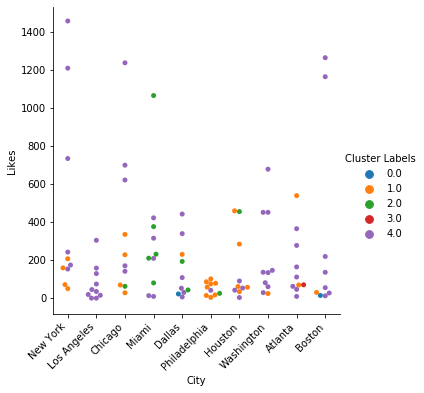

In [262]:
#top rated bars 
breweries_merged.sort_values('Likes', ascending=False).head(15)
sns.catplot(x="City", y="Likes", hue='Cluster Labels', kind="swarm", data=breweries_merged)
plt.xticks(rotation=45, ha='right')

Text(0.29999999999999716, 0.5, 'Freq of Venue')

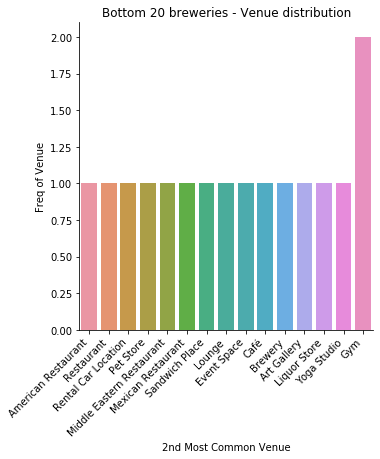

In [305]:
#top 20 bars in terms of # of likes
top_like_breweries = breweries_merged.sort_values('Likes', ascending=True).head(20)
top_like_breweries = top_like_breweries.groupby('2nd Most Common Venue').count().sort_values('Cluster Labels', ascending=True)
top_like_breweries.reset_index(inplace=True)
ax = sns.catplot(x='2nd Most Common Venue', y='Cluster Labels', kind='bar', data=top_like_breweries.iloc[:15,:6])
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 20 breweries - Venue distribution')
plt.ylabel('Freq of Venue')

In [192]:
# create map
latitude = 38
longitude = -102
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster,brewery, city in zip(breweries_merged['Brewery Latitude'], breweries_merged['Brewery Longitude'],
                                         breweries_merged['Cluster Labels'], breweries_merged['Brewery'], breweries_merged['City']):
    label = folium.Popup(str(brewery) + str(city) +' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
map_clusters.save('clusters.html')

In [309]:
breweries_merged.loc[breweries_merged['Cluster Labels'] == 0, breweries_merged.columns[[2] + list(range(3, breweries_merged.shape[1]))]]

,Brewery,Likes,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
48,Four Corners Brewing Company,22,0.0,Dallas,Food Court,Food Truck,Museum,Theater,Hotel,Park,Music Venue,History Museum,Art Gallery,Dive Bar,BBQ Joint,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
95,Backlash Beer Co.,14,0.0,Boston,Museum,Rental Car Location,BBQ Joint,Arts & Entertainment,Baseball Field,Design Studio,Food & Drink Shop,Food Court,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio


In [285]:
breweries_merged.loc[(breweries_merged['Cluster Labels'] == 1) & (breweries_merged['City'] == 'Philadelphia'), breweries_merged.columns[[2] + list(range(3, breweries_merged.shape[1]))]]
#breweries_merged.loc[(breweries_merged['Cluster Labels'] == 1) & (breweries_merged['City'] == 'Philadelphia'), breweries_merged.columns[[0] + list(range(3, breweries_merged.shape[1]))]].groupby('2nd Most Common Venue').count()

,Brewery,Likes,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
50,Philadelphia Brewing Company,78,1.0,Philadelphia,Bar,Café,Pizza Place,Athletics & Sports,Sculpture Garden,Eastern European Restaurant,Music Venue,Chinese Restaurant,Metro Station,Beer Garden,Music Store,Coffee Shop,Thrift / Vintage Store,Salon / Barbershop,Burger Joint
51,Fermentery Form,17,1.0,Philadelphia,Art Gallery,Café,Food Truck,Brewery,Lebanese Restaurant,Bar,Park,Coffee Shop,Lounge,Falafel Restaurant,Metro Station,Bagel Shop,Taco Place,Mexican Restaurant,Mini Golf
52,Evil Genius Beer Company,86,1.0,Philadelphia,Dive Bar,Café,Indian Restaurant,Taco Place,Lounge,Market,Garden,Breakfast Spot,Brewery,Frozen Yogurt Shop,Sports Bar,Mini Golf,Food Truck,Soup Place,Falafel Restaurant
53,Love City Brewing,58,1.0,Philadelphia,Gastropub,Park,Art Gallery,Food Truck,Coffee Shop,Basketball Court,Beer Garden,Beer Store,Restaurant,Board Shop,Rock Club,Martial Arts Dojo,Breakfast Spot,Recreation Center,Brewery
54,Crime & Punishment Brewing Co.,75,1.0,Philadelphia,Bus Station,Pizza Place,Café,Coffee Shop,Burger Joint,Chinese Restaurant,Bar,Liquor Store,Ethiopian Restaurant,Asian Restaurant,Sandwich Place,Italian Restaurant,American Restaurant,Discount Store,Deli / Bodega
55,Yards Brewing Company,101,1.0,Philadelphia,Coffee Shop,Mobile Phone Shop,Diner,Bar,Nightclub,Music Venue,Pizza Place,Pharmacy,Donut Shop,Sandwich Place,Tea Room,Big Box Store,Lounge,Breakfast Spot,Fried Chicken Joint
56,Original 13 Ciderworks,14,1.0,Philadelphia,Café,Brewery,Falafel Restaurant,Bar,Restaurant,Mini Golf,Colombian Restaurant,Climbing Gym,Men's Store,Arts & Entertainment,Art Gallery,Mexican Restaurant,Hobby Shop,Park,Antique Shop
58,Human Robot,4,1.0,Philadelphia,Grocery Store,Restaurant,Men's Store,Park,Light Rail Station,Sandwich Place,Colombian Restaurant,Athletics & Sports,Arts & Entertainment,Climbing Gym,Café,Brewery,Food Truck,American Restaurant,Flower Shop


In [306]:
breweries_merged.loc[breweries_merged['Cluster Labels'] == 2, breweries_merged.columns[[0] + list(range(4, breweries_merged.shape[1]))]]
#breweries_merged.loc[breweries_merged['Cluster Labels'] == 2, breweries_merged.columns[[0] + list(range(4, breweries_merged.shape[1]))]].groupby('City').count()

,Latitude,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
21,41.8373,2.0,Chicago,Art Gallery,History Museum,Food Truck,Building,Gym,Gym / Fitness Center,Furniture / Home Store,Coffee Shop,Filipino Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio
30,25.7839,2.0,Miami,Bar,Art Gallery,Ice Cream Shop,Juice Bar,Café,Brewery,Asian Restaurant,Public Art,Mexican Restaurant,Restaurant,Food Truck,Beer Garden,Boutique,Concert Hall,Theater
31,25.7839,2.0,Miami,Art Gallery,Bar,Ice Cream Shop,Restaurant,Juice Bar,Boutique,Brewery,Bakery,Mexican Restaurant,Asian Restaurant,Public Art,Beer Garden,Night Market,Italian Restaurant,Optical Shop
33,25.7839,2.0,Miami,Art Gallery,Bar,Ice Cream Shop,Restaurant,Boutique,Mexican Restaurant,Asian Restaurant,Public Art,New American Restaurant,Beer Garden,Thrift / Vintage Store,Brewery,Breakfast Spot,Diner,Optical Shop
36,25.7839,2.0,Miami,Art Gallery,Ice Cream Shop,Brewery,Food Truck,Cocktail Bar,Boutique,Bar,Beer Garden,Bakery,Restaurant,Juice Bar,Asian Restaurant,Mexican Restaurant,Public Art,Pizza Place
39,25.7839,2.0,Miami,Art Gallery,Bar,Ice Cream Shop,Brewery,Food Truck,Public Art,Beer Garden,Boutique,Mexican Restaurant,Juice Bar,Asian Restaurant,Bakery,Cocktail Bar,Neighborhood,Café
45,32.7936,2.0,Dallas,Art Gallery,Furniture / Home Store,Yoga Studio,Event Service,Mexican Restaurant,Bakery,Gym,Gym / Fitness Center,Electronics Store,Athletics & Sports,Shipping Store,Restaurant,Bridal Shop,New American Restaurant,Antique Shop
49,32.7936,2.0,Dallas,Art Gallery,Antique Shop,Fast Food Restaurant,Italian Restaurant,Fried Chicken Joint,Sandwich Place,Furniture / Home Store,Convenience Store,Gas Station,Mexican Restaurant,Bridal Shop,Print Shop,Filipino Restaurant,Farmers Market,Field
57,40.0077,2.0,Philadelphia,ATM,Art Gallery,Food Truck,Sporting Goods Shop,Tennis Stadium,Gym / Fitness Center,Grocery Store,Diner,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
60,29.7869,2.0,Houston,Art Gallery,Floating Market,Park,Beer Garden,Warehouse,Street Art,Flower Shop,Food,Flea Market,Fish Market,Financial or Legal Service,Event Space,Film Studio,Filipino Restaurant,Field


In [308]:
breweries_merged.loc[breweries_merged['Cluster Labels'] == 3, breweries_merged.columns[[2] + list(range(3, breweries_merged.shape[1]))]]

,Brewery,Likes,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
86,Scofflaw Brewing Co.,70,3.0,Atlanta,Gym,Miscellaneous Shop,Juice Bar,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Event Service,Financial or Legal Service,Fish Market


In [290]:
breweries_merged.loc[(breweries_merged['Cluster Labels'] == 4) & (breweries_merged['City'] == 'Los Angeles'),breweries_merged.columns[[2] + list(range(3, breweries_merged.shape[1]))]]
#breweries_merged.loc[breweries_merged['Cluster Labels'] == 4, breweries_merged.columns[[0] + list(range(4, breweries_merged.shape[1]))]].groupby('City').count()

,Brewery,Likes,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
10,Karl Strauss Brewing Company,129,4.0,Los Angeles,Theme Park Ride / Attraction,Theme Park,Souvenir Shop,Coffee Shop,Bar,Burger Joint,Café,Shopping Plaza,Seafood Restaurant,Cocktail Bar,Restaurant,Yoga Studio,English Restaurant,Office,New American Restaurant
11,MacLeod Ale Brewing Co.,74,4.0,Los Angeles,Rental Car Location,Food & Drink Shop,American Restaurant,Hobby Shop,Other Repair Shop,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Film Studio
12,Broxton Brew,15,4.0,Los Angeles,Coffee Shop,Pizza Place,Mediterranean Restaurant,Movie Theater,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Poke Place,Restaurant,Café,Big Box Store,Sushi Restaurant,Supermarket,Steakhouse,Mexican Restaurant
13,The Stalking Horse,35,4.0,Los Angeles,American Restaurant,Sandwich Place,Diner,Dance Studio,Gym / Fitness Center,Shipping Store,Gas Station,Martial Arts Dojo,Mobile Phone Shop,Theater,Golf Course,Restaurant,Pet Store,Pharmacy,Bookstore
14,6th & La Brea,19,4.0,Los Angeles,Coffee Shop,Yoga Studio,French Restaurant,Bakery,Bar,Dessert Shop,Pharmacy,Korean Restaurant,Liquor Store,Market,Massage Studio,Nail Salon,Paper / Office Supplies Store,New American Restaurant,Gym / Fitness Center
15,The Surly Goat,158,4.0,Los Angeles,Coffee Shop,Lounge,Art Gallery,Gym,Indian Restaurant,Mexican Restaurant,Seafood Restaurant,Gift Shop,Liquor Store,Grocery Store,Bakery,Frozen Yogurt Shop,Eastern European Restaurant,Automotive Shop,Pharmacy
16,BJ's Restaurant & Brewhouse,45,4.0,Los Angeles,Coffee Shop,Pizza Place,Grocery Store,Mediterranean Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Sushi Restaurant,Supermarket,Brewery,Café,Chinese Restaurant,Restaurant,Seafood Restaurant,Sandwich Place
17,The Village Idiot,304,4.0,Los Angeles,Café,Clothing Store,Boutique,Toy / Game Store,Cocktail Bar,Coffee Shop,Tattoo Parlor,Mediterranean Restaurant,Lingerie Store,Thai Restaurant,Optical Shop,Comedy Club,Pastry Shop,Comic Shop,BBQ Joint
18,Cismontane Brewing,0,4.0,Los Angeles,Boutique,Pet Store,Bakery,Men's Store,Vegetarian / Vegan Restaurant,Furniture / Home Store,Comedy Club,Women's Store,Café,Spa,Sushi Restaurant,French Restaurant,Mexican Restaurant,Steakhouse,Yoga Studio
19,Bulldog Brewery LA LLC,0,4.0,Los Angeles,Coffee Shop,Mexican Restaurant,Pizza Place,Women's Store,Cosmetics Shop,Salad Place,Italian Restaurant,Steakhouse,Gourmet Shop,Department Store,Burger Joint,Fast Food Restaurant,Bubble Tea Shop,Electronics Store,Food Service
